In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import datetime

# Execution Time Graph

In [14]:
spare_mbs_df = pd.read_csv("./data/spare_mandelbrotset_times.csv")[['elapsed_ms']].rename(columns = {'elapsed_ms': 'exec_time'})
spare_imgp_df = pd.read_csv("./data/spare_imageproc_times.csv")[['elapsed_ms']].rename(columns = {'elapsed_ms': 'exec_time'})
limes_df = pd.read_csv("./data/limes_times.csv")[['name', 'elapsed_time']]
limes_df['elapsed_time'] = limes_df['elapsed_time'].apply(lambda x: x / 1_000_000)
limes_mbs_df = limes_df[limes_df['name'] == 'mandelbrotset_no_io'][['elapsed_time']].rename(columns = {'elapsed_time': 'exec_time'})
limes_mbs_df.index = range(1, len(limes_mbs_df) + 1)
limes_imgp_df = limes_df[limes_df['name'] == 'image_processing_no_io'][['elapsed_time']].rename(columns = {'elapsed_time': 'exec_time'})
limes_imgp_df.index = range(1, len(limes_mbs_df) + 1)

/tmp/ipykernel_25530/1329567023.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


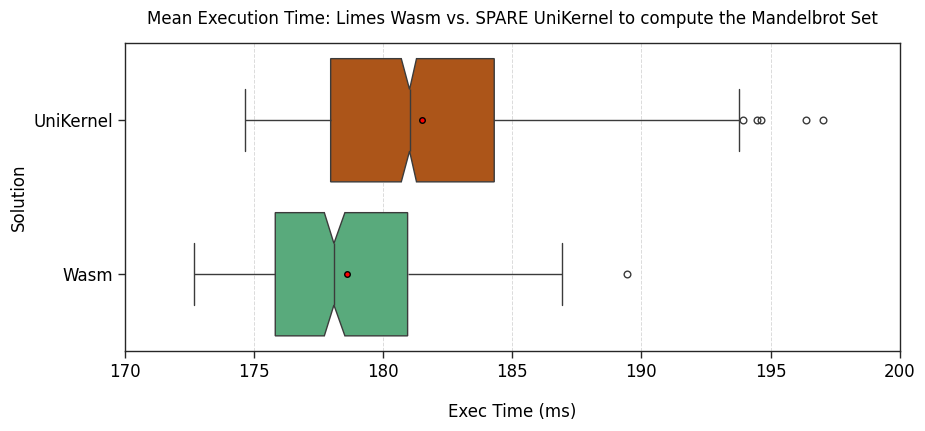

In [30]:
# Groups
spare_mbs_df['Solution'] = 'UniKernel'
limes_mbs_df['Solution'] = 'Wasm'
df = pd.concat([spare_mbs_df, limes_mbs_df])

# Init plot
sns.set_theme(style='ticks', context='paper')
plt.figure(figsize = (10,4))

# Mandelbrot Spare & Limes
palette = {'Wasm': '#4bb87a', 'UniKernel': '#c55100'}
plt.title('Mean Execution Time: Limes Wasm vs. SPARE UniKernel to compute the Mandelbrot Set', fontsize=12, pad=14, color='black')
plt.ylabel('Solution', fontsize=12, color='black')
plt.xlabel('Exec Time (ms)', fontsize=12, color='black', labelpad=16)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

plt.xlim(170, 200)

# Plot the box
sns.boxplot(
    x = 'exec_time',
    y = 'Solution',
    data = df,
    notch = True,
    vert = False,
    bootstrap = 10000,
    palette = palette,
    linewidth = 1,
    showmeans = True,
    meanprops = 
    {
        'marker':'o',
        'markerfacecolor':'red',
        'markeredgecolor':'black',
        'markersize':'4'
    }
)
plt.savefig("./plots/mandelbrotset_notch_boxplot.pdf", format = "pdf", bbox_inches = 'tight')
plt.show()

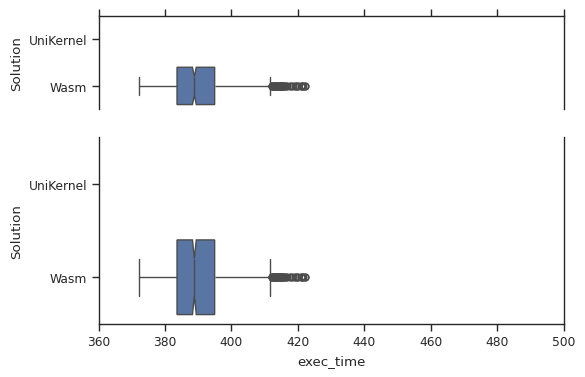

In [52]:
spare_imgp_df['Solution'] = 'UniKernel'
limes_imgp_df['Solution'] = 'Wasm'
df = pd.concat([spare_imgp_df, limes_imgp_df])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize= (6, 4), gridspec_kw={'height_ratios': [1, 2]})

# Plot the notch boxplot horizontal
sns.boxplot(data=df, y='Solution', x='exec_time', notch=True, ax=ax1)
sns.boxplot(data=df, y='Solution', x='exec_time', notch=True, ax=ax2)

# Axes limits
ax1.set_xlim(0, 160)
ax2.set_xlim(360, 500)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()



/tmp/ipykernel_25530/2788976437.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


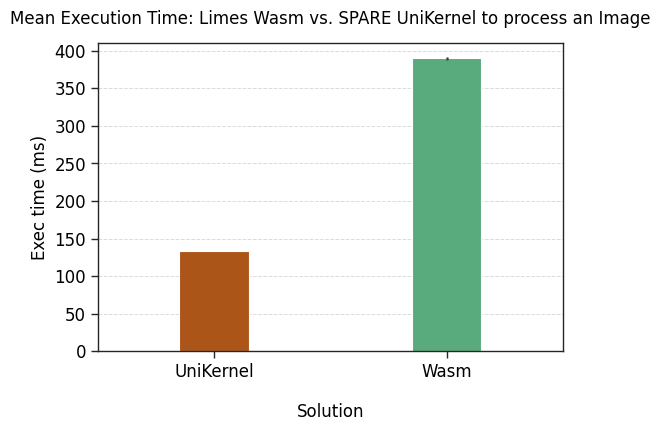

In [93]:
# Filter outliers
z_scores = st.zscore(limes_imgp_df['exec_time'])
limes_imgp_df = limes_imgp_df[(abs(z_scores) < 3)]

# Init plot
sns.set_theme(style='ticks', context='paper')
plt.figure(figsize = (6,4))

# Mandelbrot Spare & Limes
palette = {'Wasm': '#4bb87a', 'UniKernel': '#c55100'}
plt.title('Mean Execution Time: Limes Wasm vs. SPARE UniKernel to process an Image', fontsize=12, pad=14, color='black')
plt.ylabel('Exec time (ms)', fontsize=12, color='black')
plt.xlabel('Solution', fontsize=12, color='black', labelpad=16)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.7, alpha=0.7)

limes_imgp_df['Solution'] = 'Wasm'
spare_imgp_df['Solution'] = 'UniKernel'

df = pd.concat([spare_imgp_df, limes_imgp_df])

sns.barplot(
    data=df,
    x='Solution',
    y='exec_time',
    errorbar = ("ci", 95),
    width = 0.3,
    palette = palette,
)

plt.savefig("./plots/image_processing_error_bar.pdf", format = "pdf", bbox_inches = 'tight')
plt.show()